<a href="https://colab.research.google.com/github/Jake0925/Pandas/blob/master/Pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
tips = sns.load_dataset('tips')

# describe

In [2]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [36]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# 그래프 그리기

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0967e0c7f0>]],
      dtype=object)

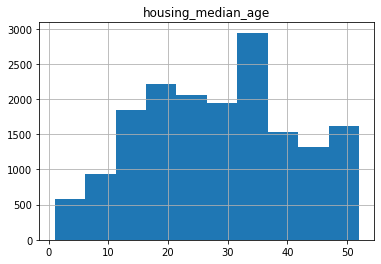

In [3]:
california_housing_dataframe.hist('housing_median_age')

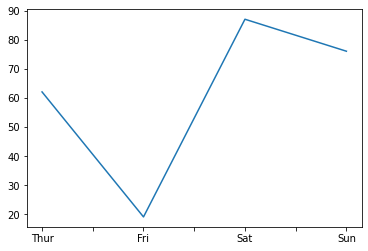

In [46]:
tips['day'].value_counts().sort_index().plot()

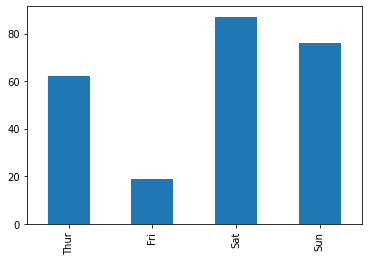

In [51]:
tips['day'].value_counts().sort_index().plot.bar() # bar그래프로 그린다

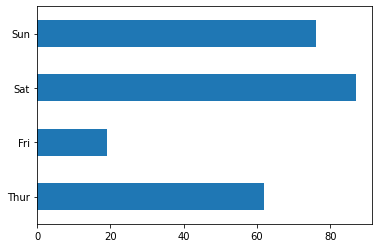

In [52]:
tips['day'].value_counts().sort_index().plot.barh() # 옆으로  바그래프를 그린다

# Series

In [4]:
city = pd.Series(["LA", 'SanFrancisco', 'NewYork'])
population = pd.Series([12345, 67890, 57545])

cities = pd.DataFrame({'City Name': city, 'Population': population})
cities

,City Name,Population
0,LA,12345
1,SanFrancisco,67890
2,NewYork,57545


Python dict/list 작업을 사용하여 DataFrame 데이터에 액세스할 수 있습니다

In [5]:
cities['City Name']

0              LA
1    SanFrancisco
2         NewYork
Name: City Name, dtype: object

In [6]:
cities['City Name'][1]

'SanFrancisco'

In [7]:
cities[0:2]

,City Name,Population
0,LA,12345
1,SanFrancisco,67890


# 데이터 조작

In [8]:
population / 100

0    123.45
1    678.90
2    575.45
dtype: float64

In [9]:
np.log(population)

0     9.421006
1    11.125644
2    10.960323
dtype: float64

In [10]:
# Series 추가
cities['Area Size'] = pd.Series([46.87, 176.53, 97.92])
cities['Density'] = cities['Population'] / cities['Area Size']
cities

,City Name,Population,Area Size,Density
0,LA,12345,46.87,263.388095
1,SanFrancisco,67890,176.53,384.580525
2,NewYork,57545,97.92,587.673611


# 조건문

In [11]:
# 단일 열 변환에는 Series.apply를 사용할 수 있다
# 조건문
population.apply(lambda val: val > 20000) # 값이 20000 이상인지 확인

0    False
1     True
2     True
dtype: bool

In [12]:
# Area Size가 100 이상이고 City Name에 'New'가 들어있어으면 True, 아니면 False 

cities["Result"] = (cities['Area Size'] > 50) & (cities["City Name"].apply(lambda val: val.startswith('New')))
cities

,City Name,Population,Area Size,Density,Result
0,LA,12345,46.87,263.388095,False
1,SanFrancisco,67890,176.53,384.580525,False
2,NewYork,57545,97.92,587.673611,True


In [13]:
data = {
    'day': ['monday', 'sunday','tuesday','saturday','friday']
}
df_day = pd.DataFrame(data)

# day항목중 saturday와 sunday을 포함하면 'weekend'항목을 추가하여 안에 True 아니편 False값 입력
df_day["weekend"] = df_day["day"].isin(["saturday", "sunday"]) 
df_day

,day,weekend
0,monday,False
1,sunday,True
2,tuesday,False
3,saturday,True
4,friday,False


# 카운트 세기

In [37]:
Count = tips[tips['size']==2]['sex'].value_counts()

print(Count)
tips

Male      98
Female    58
Name: sex, dtype: int64


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [38]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [39]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

# 비율

In [40]:
tips['day'].value_counts(normalize=True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

In [41]:
tips['day'].value_counts(normalize=True) * 100 # %로표시

Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri      7.786885
Name: day, dtype: float64

# 행과 열 전환 -transpose()

In [25]:
import pandas as pd
df = pd.DataFrame({
    'Name': ['A','B','C','D','E','F'],
    '철수':[10,20,30,40,50,60],
    '영희':[90,80,70,60,50,40]
  })

#이름 열을 인덱스로 지정
df.set_index('Name', inplace=True)

df = df.transpose()
df

Name,A,B,C,D,E,F
철수,10,20,30,40,50,60
영희,90,80,70,60,50,40


# column 순서 변경

In [28]:
# 초기엔 값이 높은 순으로 정렬된다
data['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [29]:
# index순으로 정렬
data['day'].value_counts().sort_index()

Thur    62
Fri     19
Sat     87
Sun     76
Name: day, dtype: int64

In [26]:
# 원하는 순서대로 변경
df = df[['D','A','B', 'E','C','F']]
df

Name,D,A,B,E,C,F
철수,40,10,20,50,30,60
영희,60,90,80,50,70,40
